# Shallow networks with Keras on CIFAR10
Modify your MLP version from the previous exercise towards Convolutional Neural Networks.

## Loading the packages

In [48]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

# check tensorflow installation to see if we have GPU support
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

OK: TensorFlow >= 2.0.0.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2455861153039858706
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7306523456
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9886304743597216431
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [49]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

%matplotlib inline

## Loading the raw data

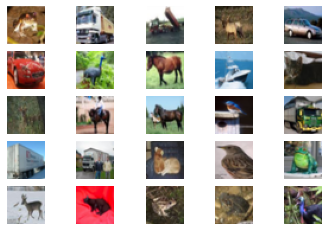

In [50]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k])
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

In [51]:
print("X-training: ", X_train.shape)
print("y-training: ", y_train.shape)
print("X-test: ", X_test.shape)
print("y-test: ", y_test.shape)

X-training:  (50000, 32, 32, 3)
y-training:  (50000, 1)
X-test:  (10000, 32, 32, 3)
y-test:  (10000, 1)


In [52]:
# Don't reshape
#X_train =  X_train.reshape(50000, 32*32*3)  #change the shape towards (50000, 32*32*3)
#X_test =  X_test.reshape(10000, 32*32*3)    #idem (10000, 32*32*3)
X_train =  X_train.astype('float32')        #change the type towards float32
X_test = X_test.astype('float32')           #idem
X_train /= 255.0                            #normalize the range to be between 0.0 and 1.0
X_test /= 255.0                             #idem
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [53]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [54]:
n_classes = 10
# Conversion to class vectors
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## CNN

### Define the network

In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dropout, BatchNormalization

epochs = 30
batches = 32           
D = X_train.shape[1]  # dimension of input sample - 32*32*3 CIFAR10

# Basic model
model = Sequential(name="simple_cnn")
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "simple_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 128)       0

### Compile and train the network

In [66]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log = model.fit(X_train,
                Y_train,
                batch_size=batches,
                epochs=epochs,
                validation_data=(X_test, Y_test))

Epoch 1/30
1563/1563 [==============================] - 27s 17ms/step - loss: 4.6316 - accuracy: 0.3330 - val_loss: 1.5367 - val_accuracy: 0.4794
Epoch 2/30
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2170 - accuracy: 0.5766 - val_loss: 1.1995 - val_accuracy: 0.6176
Epoch 3/30
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0118 - accuracy: 0.6479 - val_loss: 1.2167 - val_accuracy: 0.5896
Epoch 4/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8974 - accuracy: 0.6922 - val_loss: 1.0506 - val_accuracy: 0.6668
Epoch 5/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8046 - accuracy: 0.7212 - val_loss: 1.1100 - val_accuracy: 0.6207
Epoch 6/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7134 - accuracy: 0.7542 - val_loss: 0.9800 - val_accuracy: 0.6778
Epoch 7/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6293 - accuracy: 0.7861 - val_loss: 0.8828 -

## Evaluate the network


### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

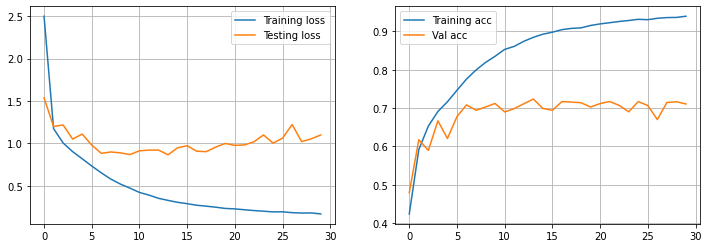

In [67]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [68]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.0994541645050049
Test accuracy: 0.7106999754905701


### Notes
It is confirmed that the performance gained using the simple CNN is more than ~10% compared to the initial two layers MLP.

In [70]:
import pandas as pd
print(pd.DataFrame([
{
  "Architecture": "Layer 1: CONV D=32, w=h=3, S=1, P='same'; Layer 2: MaxPooling2D S=2; Layer 3: DENSE D=10",
  "train": 0.7758,
  "test": 0.6531
},{
  "Architecture": "Layer 1: CONV D=32, w=h=3, S=1, P='same'; Layer 2: MaxPooling2D S=2; Layer 3: DENSE D=64; Layer 3: DENSE D=64; Layer 3: DENSE D=10",
  "train": 0.9298,
  "test": 0.6366
},{
  "Architecture": "Layer 1: CONV D=32, w=h=3, S=1, P='same'; Layer 2: CONV D=64, w=h=3, S=1, P='same'; Layer 3: CONV D=128, w=h=3, S=1, P='same'; Layer 4: MaxPooling2D S=2; Layer 5: MaxPooling2D S=2; Layer 6: DENSE D=64; Layer 7: DENSE D=64; Layer 8: DENSE D=10",
  "train": 0.9603,
  "test": 0.6855
},{
  "Architecture": "CONV D=32, w=h=3, S=1, P='same'; BATCHNORM; DROPOUT(0.4); CONV D=64, w=h=5, S=1, P='same'; BATCHNORM; DROPOUT(0.4); MaxPooling2D S=2; Layer 8: DENSE D=10",
  "train": 0.8801,
  "test": 0.6980
},{
  "Architecture": "CONV D=64, w=h=3, S=1, P='same'; BATCHNORM; DROPOUT(0.4); CONV D=128, w=h=5, S=1, P='same'; BATCHNORM; DROPOUT(0.4); MaxPooling2D S=2; Layer 8: DENSE D=10",
  "train": 0.9424,
  "test": 0.7106
}
]).to_string())


                                                                                                                                                                                                                                         Architecture   train    test
0                                                                                                                                                            Layer 1: CONV D=32, w=h=3, S=1, P='same'; Layer 2: MaxPooling2D S=2; Layer 3: DENSE D=10  0.7758  0.6531
1                                                                                                                  Layer 1: CONV D=32, w=h=3, S=1, P='same'; Layer 2: MaxPooling2D S=2; Layer 3: DENSE D=64; Layer 3: DENSE D=64; Layer 3: DENSE D=10  0.9298  0.6366
2  Layer 1: CONV D=32, w=h=3, S=1, P='same'; Layer 2: CONV D=64, w=h=3, S=1, P='same'; Layer 3: CONV D=128, w=h=3, S=1, P='same'; Layer 4: MaxPooling2D S=2; Layer 5: MaxPooling2D S=2; Layer 6: DENSE D=64; Layer 7: 